# COMP 4605.1 Data Mining - Final Project - Price Prediction 
### Part 1 (Electric Vehicle Dataset)

Rana Selim - 19COMP1009 
______________________________________________________________________________________


# ----- DATA CLEANING ----- #

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm

In [3]:
df= pd.read_csv('../Final Project/ElectricCarData.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Brand        103 non-null    object
 1   Model        103 non-null    object
 2   Accel        103 non-null    object
 3   TopSpeed     103 non-null    object
 4   Range        103 non-null    object
 5   Efficiency   103 non-null    object
 6   FastCharge   103 non-null    object
 7   RapidCharge  103 non-null    object
 8   PowerTrain   103 non-null    object
 9   PlugType     103 non-null    object
 10  BodyStyle    103 non-null    object
 11  Segment      103 non-null    object
 12  Seats        103 non-null    int64 
 13  PriceEuro    103 non-null    int64 
dtypes: int64(2), object(12)
memory usage: 11.4+ KB


In [5]:
df.head()

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6 sec,233 km/h,450 km,161 Wh/km,940 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0 sec,160 km/h,270 km,167 Wh/km,250 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7 sec,210 km/h,400 km,181 Wh/km,620 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8 sec,180 km/h,360 km,206 Wh/km,560 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5 sec,145 km/h,170 km,168 Wh/km,190 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,32997


In [6]:
df = df.fillna('0')

In [7]:
print(df.columns.tolist())

['Brand', 'Model', 'Accel', 'TopSpeed', 'Range', 'Efficiency', 'FastCharge', 'RapidCharge', 'PowerTrain', 'PlugType', 'BodyStyle', 'Segment', 'Seats', 'PriceEuro']


In [8]:
Acceleration = []
for item in df['Accel']:
    Acceleration += [float(item.replace(' sec',''))]
df['Accel'] = Acceleration

In [9]:
TopSpeed = []
for item in df['TopSpeed']:
    TopSpeed += [int(item.replace(' km/h',''))]
df['TopSpeed'] = TopSpeed

In [10]:
Range = []
for item in df['Range']:
    Range += [int(item.replace(' km',''))]
df['Range'] = Range

In [11]:
Efficiency = []
for item in df['Efficiency']:
    Efficiency += [int(item.replace(' Wh/km',''))]
df['Efficiency'] = Efficiency

## Handling missing values: #

In [12]:
FastCharge = []
for item in df['FastCharge']:
    FastCharge += [(item.replace('-','0'))]
df['FastCharge'] = FastCharge

In [13]:
FastCharge = []
for item in df['FastCharge']:
    FastCharge += [int(item.replace(' km/h',''))]
df['FastCharge'] = FastCharge

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Brand        103 non-null    object 
 1   Model        103 non-null    object 
 2   Accel        103 non-null    float64
 3   TopSpeed     103 non-null    int64  
 4   Range        103 non-null    int64  
 5   Efficiency   103 non-null    int64  
 6   FastCharge   103 non-null    int64  
 7   RapidCharge  103 non-null    object 
 8   PowerTrain   103 non-null    object 
 9   PlugType     103 non-null    object 
 10  BodyStyle    103 non-null    object 
 11  Segment      103 non-null    object 
 12  Seats        103 non-null    int64  
 13  PriceEuro    103 non-null    int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 11.4+ KB



# ----- Rename Data Frame Columns ----- #


In [15]:
df.describe()

,Accel,TopSpeed,Range,Efficiency,FastCharge,Seats,PriceEuro
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.396117,179.194175,338.786408,189.165049,434.563107,4.883495,55811.563107
std,3.017430,43.573030,126.014444,29.566839,219.660061,0.795834,34134.665280
min,2.100000,123.000000,95.000000,104.000000,0.000000,2.000000,20129.000000
25%,5.100000,150.000000,250.000000,168.000000,260.000000,5.000000,34429.500000
50%,7.300000,160.000000,340.000000,180.000000,440.000000,5.000000,45000.000000
75%,9.000000,200.000000,400.000000,203.000000,555.000000,5.000000,65000.000000
max,22.400000,410.000000,970.000000,273.000000,940.000000,7.000000,215000.000000


In [16]:
df = df.rename(columns = {'Accel':'Acceleration(sec)'})

In [17]:
df = df.rename(columns = {'TopSpeed':'TopSpeed(km/h)'})

In [18]:
df = df.rename(columns = {'Range':'Range(km)'})

In [19]:
df = df.rename(columns = {'Efficiency':'Efficiency(Wh/km)'})

In [20]:
df = df.rename(columns = {'FastCharge':'FastCharge(km/h)'})

In [21]:
df.corr()

,Acceleration(sec),TopSpeed(km/h),Range(km),Efficiency(Wh/km),FastCharge(km/h),Seats,PriceEuro
Acceleration(sec),1.000000,-0.786195,-0.677062,-0.382904,-0.782324,-0.175335,-0.627174
TopSpeed(km/h),-0.786195,1.000000,0.746662,0.355675,0.778422,0.126470,0.829057
Range(km),-0.677062,0.746662,1.000000,0.313077,0.750859,0.300163,0.674844
Efficiency(Wh/km),-0.382904,0.355675,0.313077,1.000000,0.319678,0.301230,0.396705
FastCharge(km/h),-0.782324,0.778422,0.750859,0.319678,1.000000,0.262732,0.658882
Seats,-0.175335,0.126470,0.300163,0.301230,0.262732,1.000000,0.020920
PriceEuro,-0.627174,0.829057,0.674844,0.396705,0.658882,0.020920,1.000000


# ----- Visualize  ----- #

* Correlation is used in linear regression models to determine the strength of the relationship between the dependent and independent variables. 
* The linear regression model is a machine learning algorithm that is used to predict a continuous value, such as a price or quantity. 
* The linear regression model uses the correlation between the dependent and independent variables to determine how much of the dependent variable is explained by the independent variable. 

<AxesSubplot:>

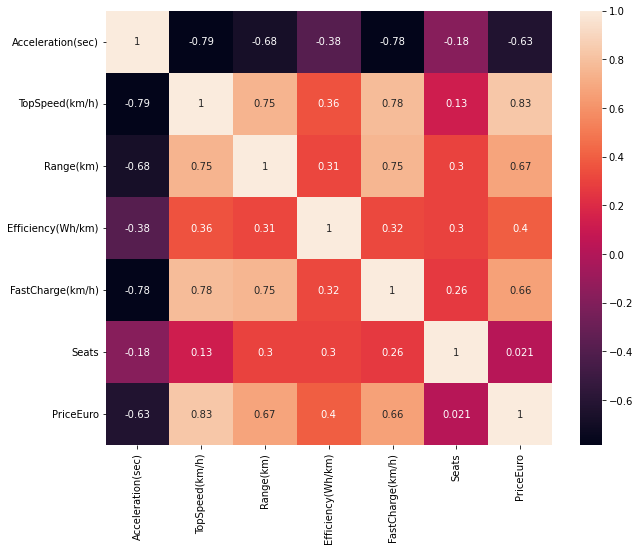

In [47]:
plt.figure(figsize=(10,8))
sb.heatmap(df.corr(), annot=True)

## PowerTrain Count

<AxesSubplot:xlabel='PowerTrain', ylabel='count'>

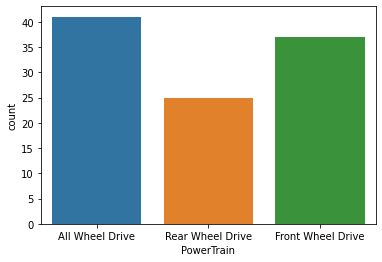

In [23]:
sb.countplot(x = 'PowerTrain', data = df)

sb.countplot(x = 'Seats', data = df)

## Segment Count

<AxesSubplot:xlabel='Segment', ylabel='count'>

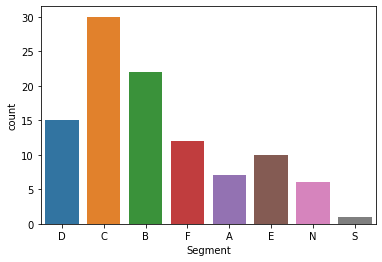

In [24]:
sb.countplot(x = 'Segment', data = df)

Text(0.5, 1.0, 'Segment')

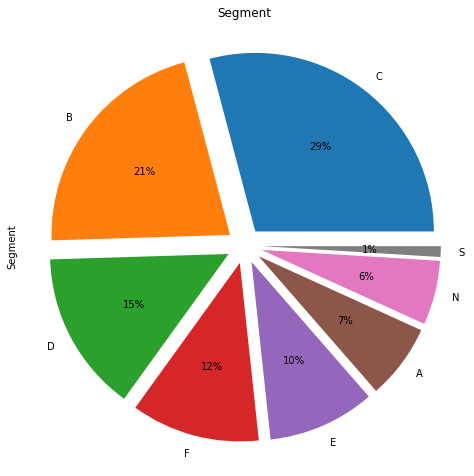

In [25]:
df['Segment'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1))
plt.title('Segment')

## BodyStyle Count

<AxesSubplot:xlabel='BodyStyle', ylabel='count'>

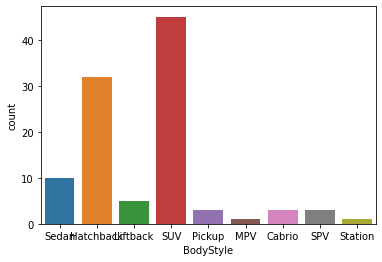

In [26]:
sb.countplot(x = 'BodyStyle', data = df)

## Brand Count

<AxesSubplot:xlabel='count', ylabel='Brand'>

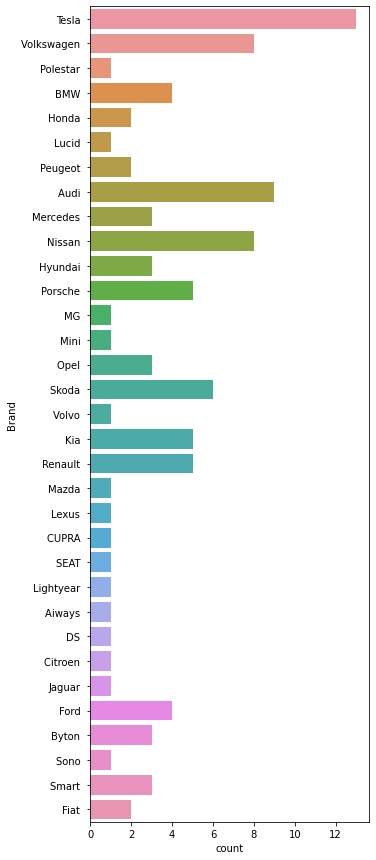

In [27]:
plt.figure(figsize=(5,15))
sb.countplot(y = 'Brand', data = df)

## Price X Efficiency X PowerTrain

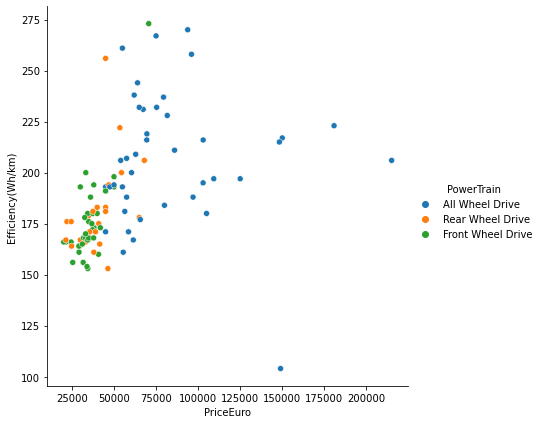

In [28]:
sb.relplot(x="PriceEuro", y="Efficiency(Wh/km)", height=6,hue="PowerTrain",data=df)

## Price X Efficiency X Seats

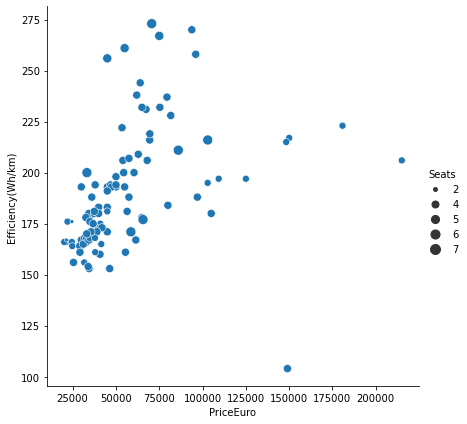

In [29]:
sb.relplot(x="PriceEuro", y="Efficiency(Wh/km)",size="Seats", height=6,sizes=(15, 100),data=df)

## Price X Range X PowerTrain

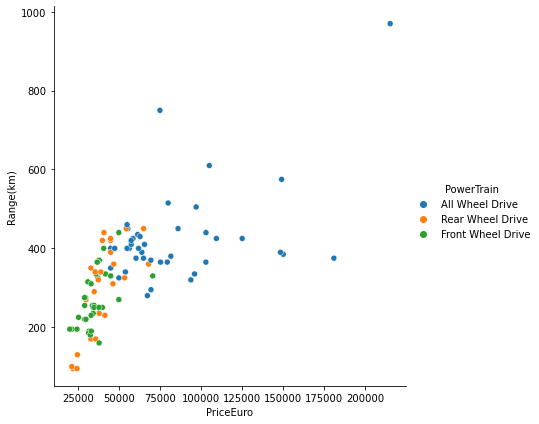

In [30]:
sb.relplot(x="PriceEuro", y="Range(km)", height=6,hue="PowerTrain",data=df)

## Pairplot of Data

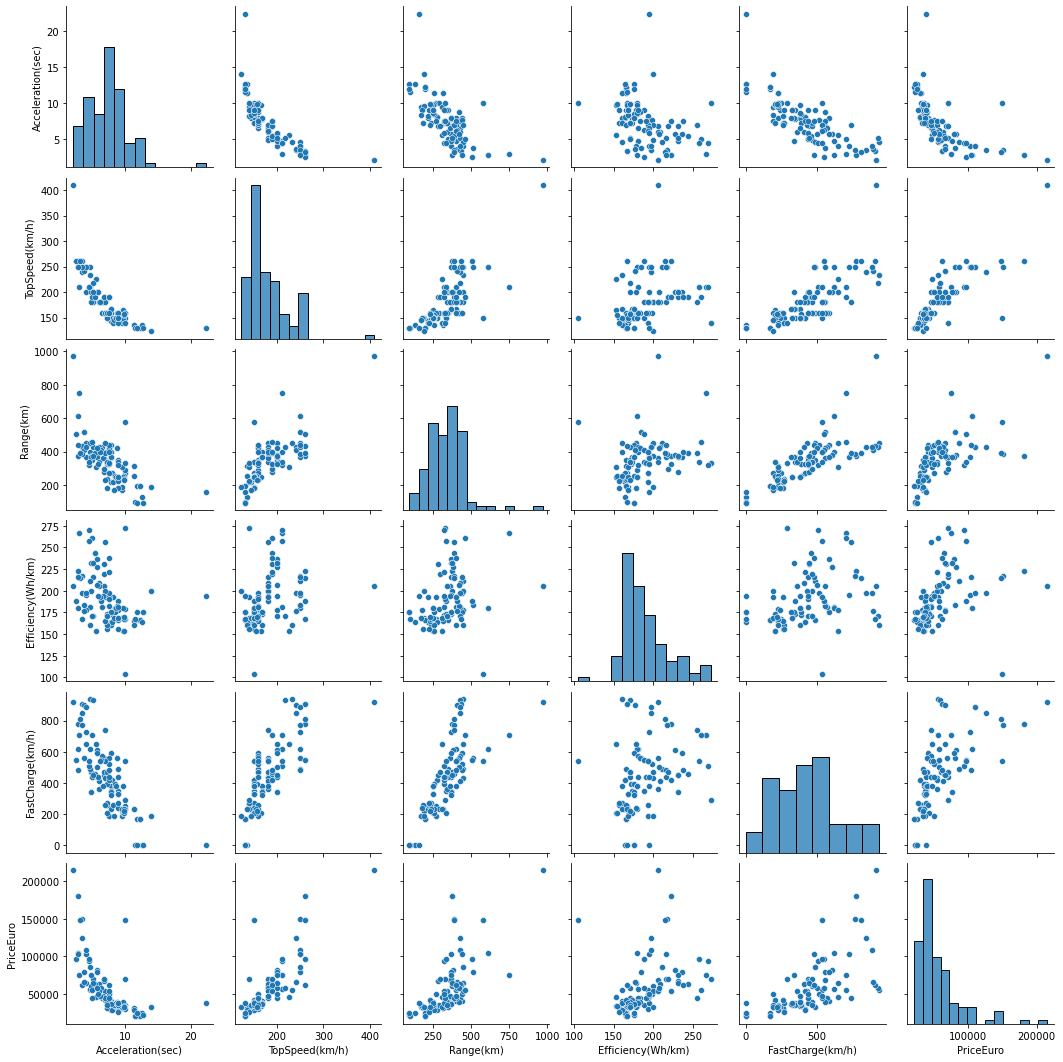

In [31]:
col = ['Acceleration(sec)','TopSpeed(km/h)','Range(km)','Efficiency(Wh/km)','FastCharge(km/h)','PriceEuro']
sb.pairplot(df[col])

## Price X Brand

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32, 0, 'Fiat ')])

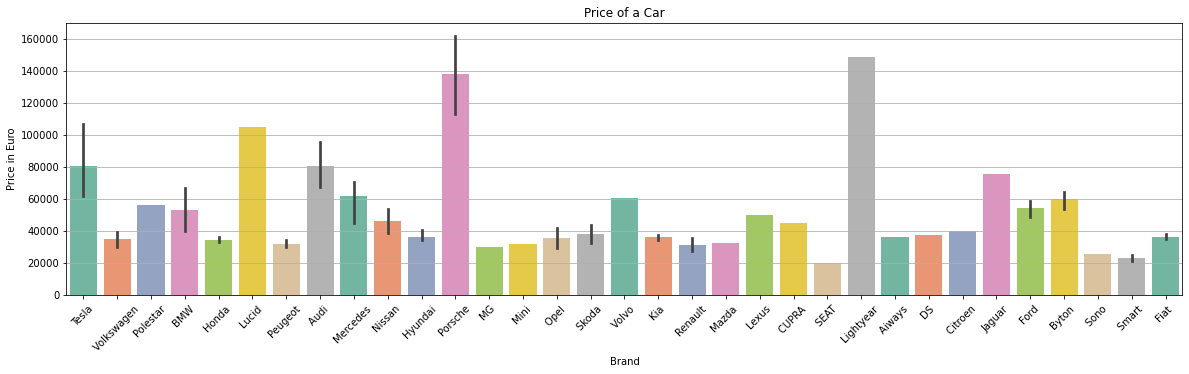

In [32]:
ax= plt.figure(figsize=(20,5))
sb.barplot(x='Brand',y='PriceEuro',data=df,palette='Set2')
plt.title('Price of a Car')
plt.xlabel('Brand')
plt.grid(axis='y')
plt.ylabel('Price in Euro')
plt.xticks(rotation=45)


# Conclusions

* Most of the cars are "All Wheel Drive" and C segment.
* Least of the cars are "Rear Wheel Drive" and S segment.
* Tesla has the most EVs than any other manufacturer in this dataset.
* Most of the vehicles costing less than 50,000 Euros are Front Wheel Drive.
* Almost every car turns out as "All Wheel Drive" when efficiency, range and price increase. 

In [33]:
numerical_cols = df.select_dtypes(exclude=['object']).columns


df[numerical_cols].head(2)


,Acceleration(sec),TopSpeed(km/h),Range(km),Efficiency(Wh/km),FastCharge(km/h),Seats,PriceEuro
0,4.6,233,450,161,940,5,55480
1,10.0,160,270,167,250,5,30000


## Fitting all features with price

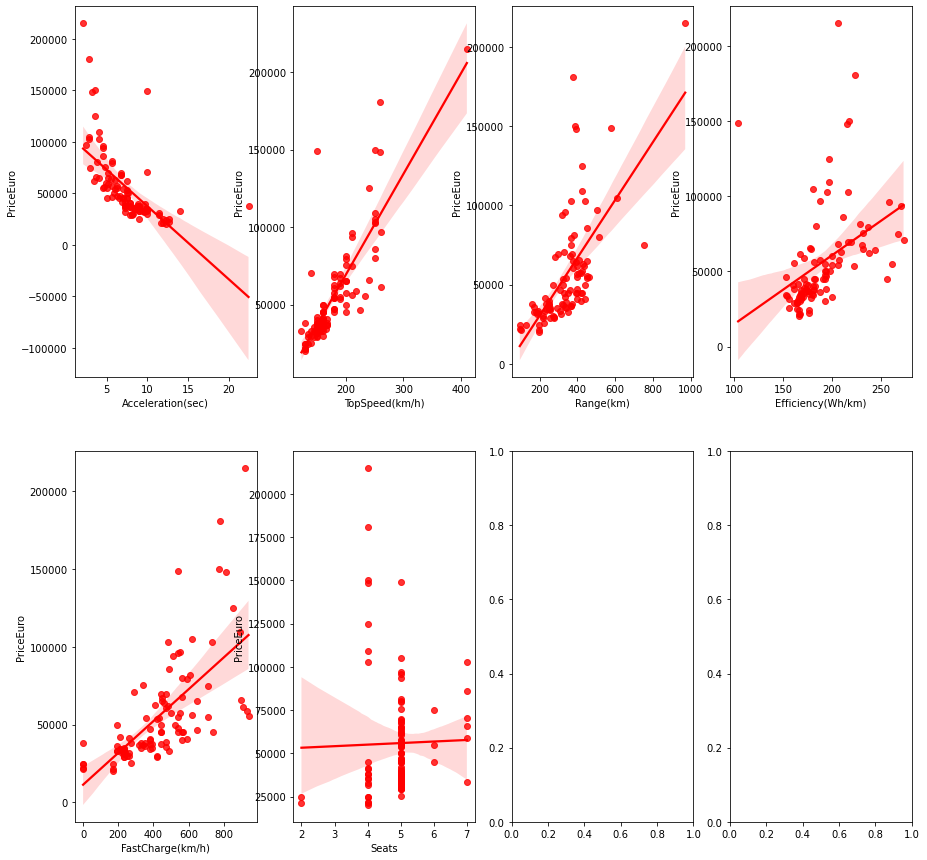

In [34]:
fig,axes = plt.subplots(2,4,figsize=(15,15))
for seg,col in enumerate(numerical_cols[:len(numerical_cols)-1]):
    
    x,y = seg//4,seg%4
    sb.regplot(x=col, y='PriceEuro' ,data=df,ax=axes[x][y],color='r')

What data says according to Price in Euro:

* Acceleration(sec) is averagely distributed over the interval of [4-15] .
* TopSpeed(km/h) is averagely distributed over the interval of [0-250] .
* Range(km) is averagely distributed over the interval of [0-410] .
* Efficiency(Wh/km) is averagely distributed over the interval of [150-200] .
* FastCharge(km/h) is averagely distributed over the interval of [200-500] . 

# ----- Linear Regression ----- #

### Get Data Ready For Training a Linear Regression Model

Let’s now begin to train out the regression model. 
We will need to first split up our data into an X list that contains the features to train on, 
and a y list with the target variable, in this case, the Price column. 
We will ignore other columns because they only have text which is not useful for linear regression modeling.

In [35]:
x = df[['Acceleration(sec)','Range(km)','TopSpeed(km/h)','Efficiency(Wh/km)','FastCharge(km/h)']]
y = df['PriceEuro']

### Split Data into Train, Test

Now we will split our dataset into a training set and testing set using sklearn train_test_split(). the training set will be going to use for training the model and testing set for testing the model. We are creating a split of 40% training data and 60% of the training set.

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=101) 

X_train and y_train contain data for the training model. X_test and y_test contain data for the testing model. X and y are features and target variable names.

### Creating and Training the LinearRegression Model

We will import and create sklearn linearmodel LinearRegression object and fit the training dataset in it.

In [37]:
from sklearn.linear_model import LinearRegression 

lm = LinearRegression() 

lm.fit(X_train,y_train)

LinearRegression()

In [38]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) 

LinearRegression()

### LinearRegression Model Evaluation

Now let’s evaluate the model by checking out its coefficients and how we can interpret them.

In [39]:
print(lm.intercept_)

-90265.9351048001


In [40]:
coeff_df = pd.DataFrame(lm.coef_,x.columns,columns=['Coefficient']) 
coeff_df

,Coefficient
Acceleration(sec),-120.714226
Range(km),-9.377109
TopSpeed(km/h),588.489583
Efficiency(Wh/km),253.459023
FastCharge(km/h),-16.417720


What does coefficient of data says:

* Holding all other features fixed, a 1 unit increase in Acceleration(sec) is associated with an decrease of €120.71 .
* Holding all other features fixed, a 1 unit increase in Range(km) is associated with an decrease of €9.37 .
* Holding all other features fixed, a 1 unit increase in TopSpeed(km/h) is associated with an increase of €588.48 .
* Holding all other features fixed, a 1 unit increase in Efficiency(Wh/km) is associated with an increase of €253.45 .
* Holding all other features fixed, a 1 unit increase in FastCharge(km/h) is associated with an decrease of €16.41 . 

### Predictions from our Linear Regression Model

In [41]:
predictions = lm.predict(X_test) 

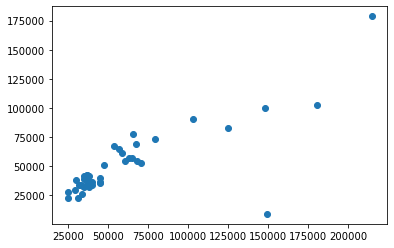

In [42]:
plt.scatter(y_test,predictions)

In the above scatter plot, we see data starts with a line form and spread linearly with price which means our model has done good predictions at only interval of [0-100000]. Because of that error numbers will be really high according to total.

### Regression Evaluation Metrics

Here are two common evaluation metrics for regression problems:

* Mean Squared Error (MSE)
MSE is calculated by taking the average of the square of the difference between the original and predicted values of the data.
* Root Mean Squared Error (RMSE)
RMSE is the standard deviation of the errors which occur when a prediction is made on a dataset. 

In [46]:
from sklearn import metrics

print('MSE:', metrics.mean_squared_error(y_test, predictions)) 
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions))) 

MSE: 788382483.4449916
RMSE: 28078.14957302193
